### Dota 2 Professional Hero Picks

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from autoviz.AutoViz_Class import AutoViz_Class

### Importing the hero picks dataset

In [2]:
picks = pd.read_csv('picks_data.csv')

In [3]:
picks.head()

,loosing_hero_id_1,loosing_hero_id_2,loosing_hero_id_3,loosing_hero_id_4,loosing_hero_id_5,winning_hero_id_1,winning_hero_id_2,winning_hero_id_3,winning_hero_id_4,winning_hero_id_5
0,18,28,43,75,84,60,71,74,87,93
1,47,72,78,86,107,11,12,30,38,51
2,21,51,65,71,73,13,63,66,80,89
3,11,26,83,93,110,8,22,33,90,97
4,15,16,21,26,99,7,11,47,93,102


### Splitting the data into winning teams and loosing teams to perform analysis

In [4]:
win_teams = picks.iloc[:,5:]

In [5]:
win_teams

,winning_hero_id_1,winning_hero_id_2,winning_hero_id_3,winning_hero_id_4,winning_hero_id_5
0,60,71,74,87,93
1,11,12,30,38,51
2,13,63,66,80,89
3,8,22,33,90,97
4,7,11,47,93,102
...,...,...,...,...,...
71430,2,17,50,54,84
71431,1,14,16,67,81
71432,1,11,50,85,100
71433,7,18,27,36,51


In [6]:
lost_teams = picks.iloc[:,:5]

In [7]:
lost_teams

,loosing_hero_id_1,loosing_hero_id_2,loosing_hero_id_3,loosing_hero_id_4,loosing_hero_id_5
0,18,28,43,75,84
1,47,72,78,86,107
2,21,51,65,71,73
3,11,26,83,93,110
4,15,16,21,26,99
...,...,...,...,...,...
71430,11,20,36,68,69
71431,42,85,89,99,111
71432,7,12,21,25,75
71433,44,53,64,71,74


### Converting the dataframe to an array to make it easier to count the number of times a particular hero was picked

In [8]:
win_teams = win_teams.to_numpy()

In [9]:
win_teams

array([[ 60,  71,  74,  87,  93],
       [ 11,  12,  30,  38,  51],
       [ 13,  63,  66,  80,  89],
       ...,
       [  1,  11,  50,  85, 100],
       [  7,  18,  27,  36,  51],
       [  5,  47,  51,  78,  85]])

In [10]:
wt = np.concatenate(win_teams, axis=0)

In [11]:
wt

array([60, 71, 74, ..., 51, 78, 85])

In [12]:
lost_teams = lost_teams.to_numpy()

In [13]:
lost_teams

array([[ 18,  28,  43,  75,  84],
       [ 47,  72,  78,  86, 107],
       [ 21,  51,  65,  71,  73],
       ...,
       [  7,  12,  21,  25,  75],
       [ 44,  53,  64,  71,  74],
       [ 23,  30,  44,  83,  88]])

In [14]:
lt = np.concatenate(lost_teams, axis=0)

In [15]:
lt

array([18, 28, 43, ..., 44, 83, 88])

### Now we find the count for all the heros of the number of times they were picked for winnning and loosing scenarious saperatly

In [16]:
wtCountDf = Counter(wt)

In [17]:
wtFreqdf= pd.DataFrame([wtCountDf.keys(), wtCountDf.values()]).T
wtFreqdf.columns= ['id', 'Number of Wins']

In [18]:
wtFreqdf = wtFreqdf.sort_values(by=['id'], ascending=True)
wtFreqdf

,id,Number of Wins
87,1,2485
31,2,3094
71,3,3086
88,4,1290
67,5,3784
...,...,...
56,110,1882
108,111,1331
105,112,2374
111,113,125


In [19]:
ltCountDf = Counter(lt)

In [20]:
ltFreqdf= pd.DataFrame([ltCountDf.keys(), ltCountDf.values()]).T
ltFreqdf.columns= ['id', 'Number of Defeats']

In [21]:
ltFreqdf = ltFreqdf.sort_values(by=['id'], ascending=True)
ltFreqdf

,id,Number of Defeats
80,1,2574
71,2,3375
48,3,3070
91,4,1388
51,5,3616
...,...,...
19,110,1924
104,111,1417
87,112,2369
112,113,127


### Loading the hero names dataset to map with the hero id's

In [22]:
heros = pd.read_csv('HeroNames.csv')

In [23]:
heros

,id,name
0,1,antimage
1,2,axe
2,3,bane
3,4,bloodseeker
4,5,crystal_maiden
...,...,...
108,105,techies
109,112,winter_wyvern
110,113,arc_warden
111,108,abyssal_underlord


### Merging the tables to map hero Id to hero names

In [24]:
winHeros = pd.merge(wtFreqdf, heros)
winHeros

,id,Number of Wins,name
0,1,2485,antimage
1,2,3094,axe
2,3,3086,bane
3,4,1290,bloodseeker
4,5,3784,crystal_maiden
...,...,...,...
108,110,1882,phoenix
109,111,1331,oracle
110,112,2374,winter_wyvern
111,113,125,arc_warden


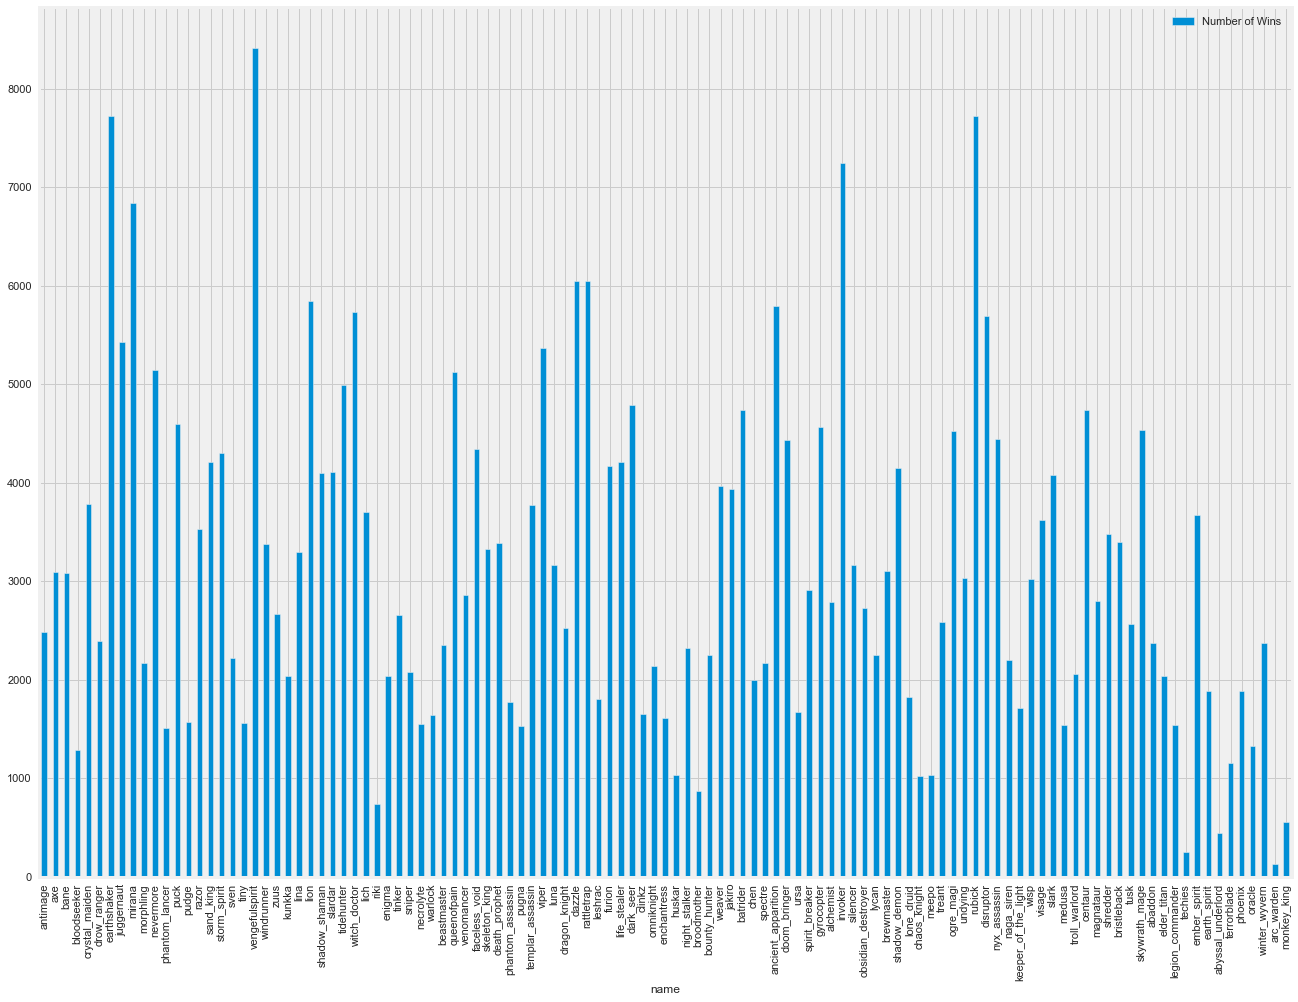

In [34]:
winHeros.plot.bar(x="name",y="Number of Wins", figsize=(20, 16))
plt.show()

In [26]:
lostHeros = pd.merge(ltFreqdf, heros)
lostHeros

,id,Number of Defeats,name
0,1,2574,antimage
1,2,3375,axe
2,3,3070,bane
3,4,1388,bloodseeker
4,5,3616,crystal_maiden
...,...,...,...
108,110,1924,phoenix
109,111,1417,oracle
110,112,2369,winter_wyvern
111,113,127,arc_warden


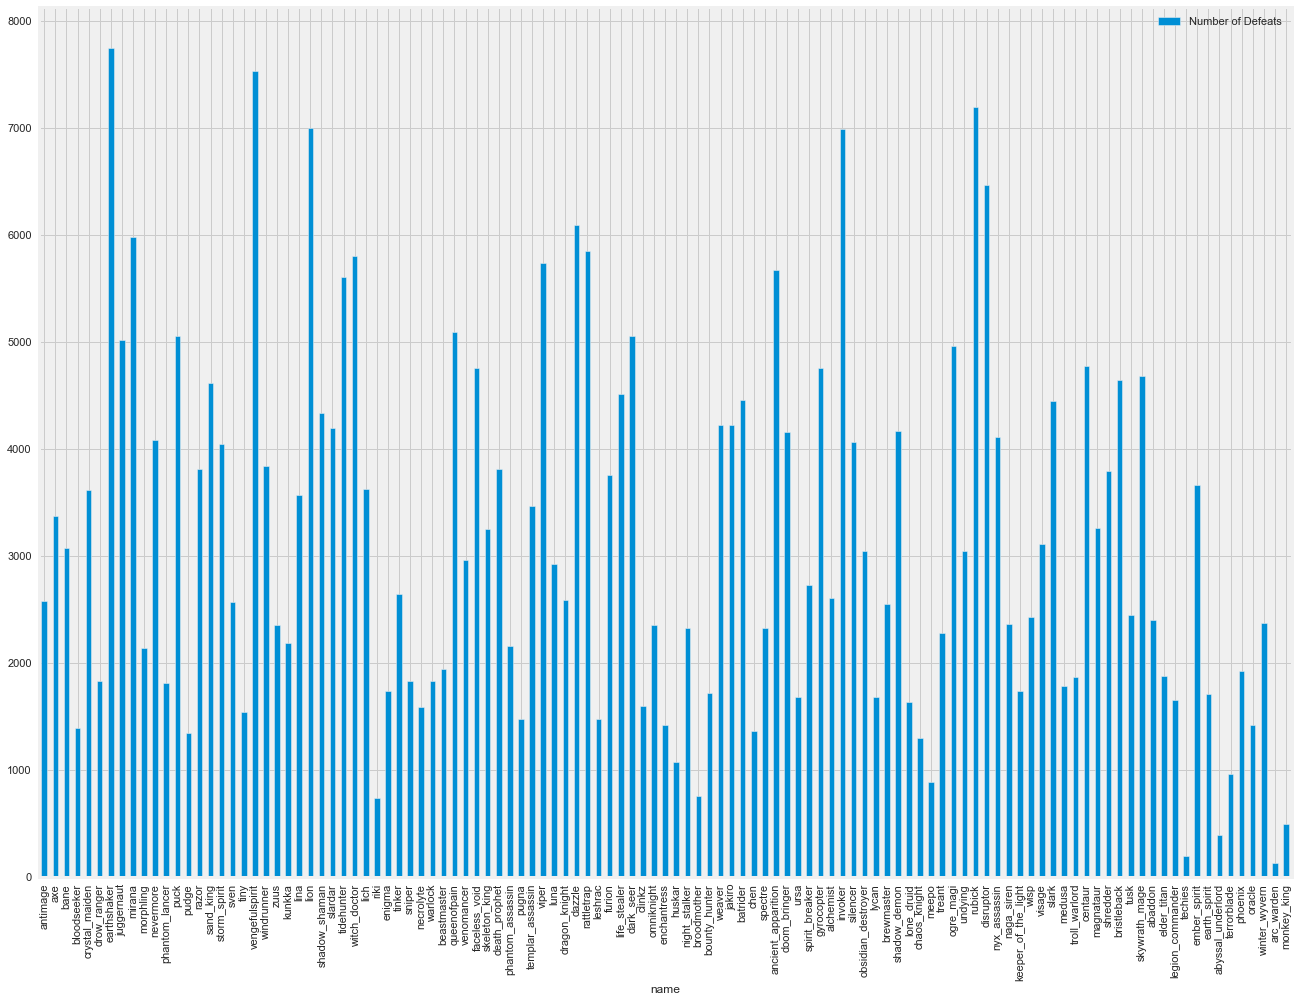

In [37]:
lostHeros.plot.bar(x="name",y="Number of Defeats", figsize=(20, 16))
plt.show()

### Now merging both the table to calcute game statistics

In [27]:
heroMerge = pd.merge(winHeros, lostHeros)
heroMerge

,id,Number of Wins,name,Number of Defeats
0,1,2485,antimage,2574
1,2,3094,axe,3375
2,3,3086,bane,3070
3,4,1290,bloodseeker,1388
4,5,3784,crystal_maiden,3616
...,...,...,...,...
108,110,1882,phoenix,1924
109,111,1331,oracle,1417
110,112,2374,winter_wyvern,2369
111,113,125,arc_warden,127


### Calculating the total matches played by a hero, total matches won, total matches lost, determining their popularity

In [28]:
heroMerge['Total Matches'] = heroMerge['Number of Wins'] + heroMerge['Number of Defeats']
heroMerge['Win Rate'] = heroMerge['Number of Wins']/heroMerge['Total Matches']
heroMerge['Lost Rate'] = heroMerge['Number of Defeats']/heroMerge['Total Matches']
heroMerge['Popularity'] = round(heroMerge['Total Matches']/picks.shape[0], 3)
heroMerge

,id,Number of Wins,name,Number of Defeats,Total Matches,Win Rate,Lost Rate,Popularity
0,1,2485,antimage,2574,5059,0.491204,0.508796,0.071
1,2,3094,axe,3375,6469,0.478281,0.521719,0.091
2,3,3086,bane,3070,6156,0.501300,0.498700,0.086
3,4,1290,bloodseeker,1388,2678,0.481703,0.518297,0.037
4,5,3784,crystal_maiden,3616,7400,0.511351,0.488649,0.104
...,...,...,...,...,...,...,...,...
108,110,1882,phoenix,1924,3806,0.494482,0.505518,0.053
109,111,1331,oracle,1417,2748,0.484352,0.515648,0.038
110,112,2374,winter_wyvern,2369,4743,0.500527,0.499473,0.066
111,113,125,arc_warden,127,252,0.496032,0.503968,0.004


### Utilizing Autoviz to generate meaning full relations between various columns of the above table

In [29]:
heroFinalCSV = heroMerge.to_csv('HeroFinal.csv', index=False)
heroFinalCSV

In [30]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (113, 8)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    8 Predictors classified...
        3 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


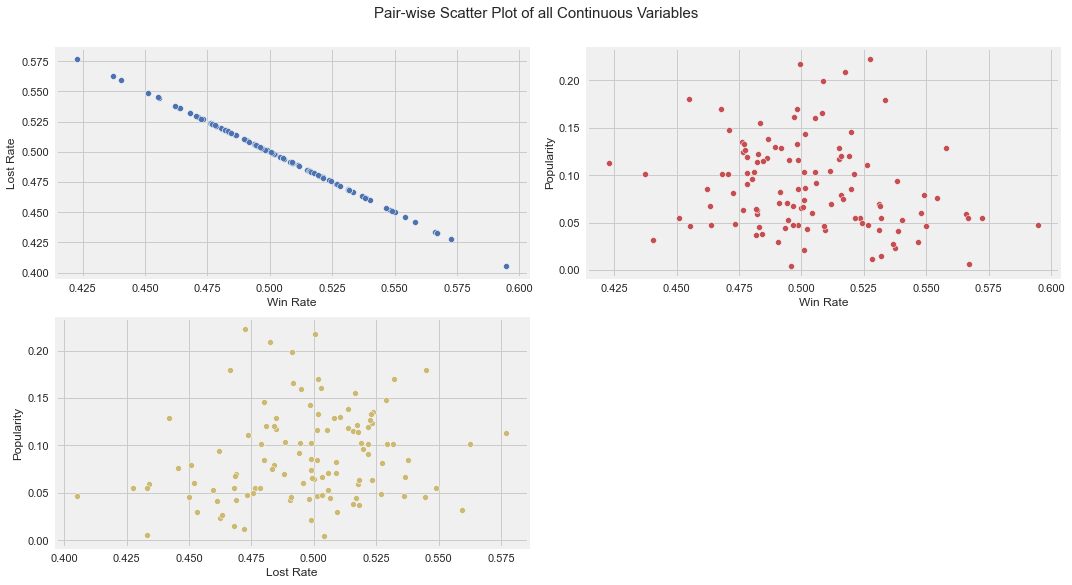

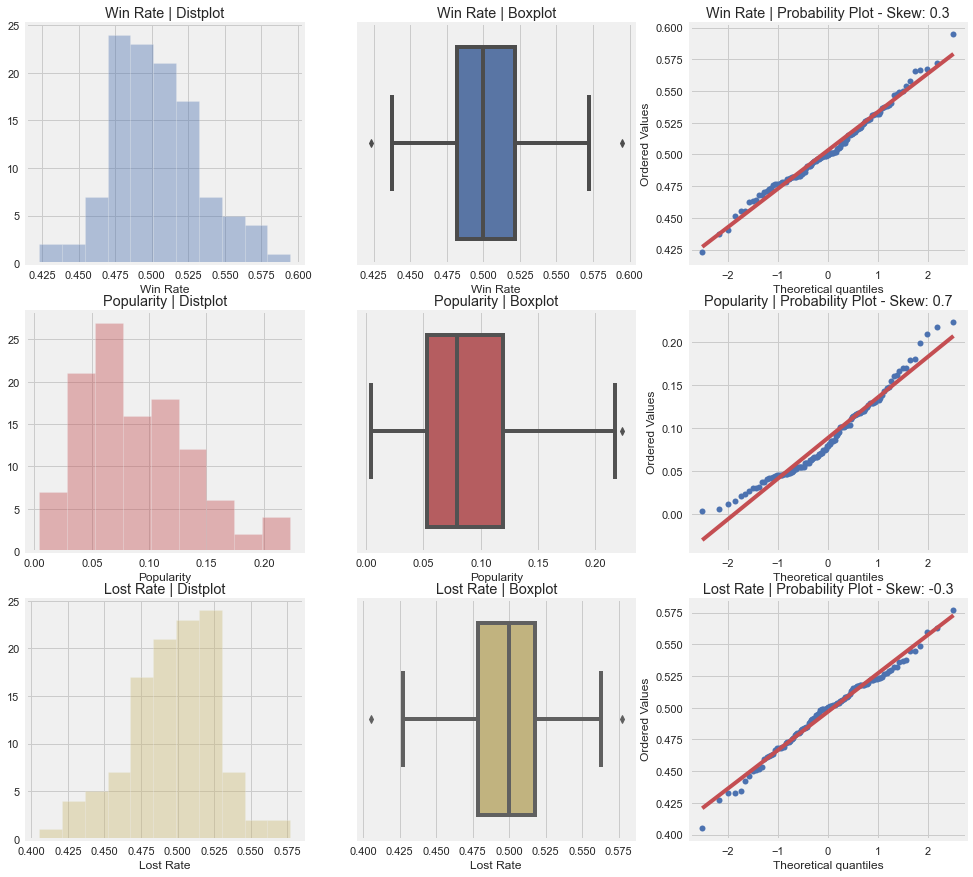

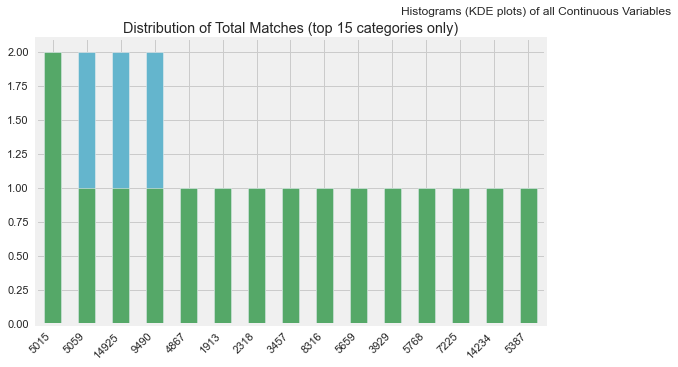

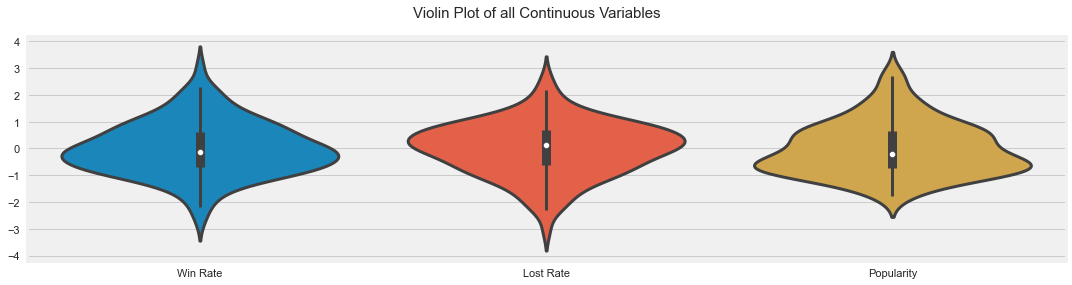

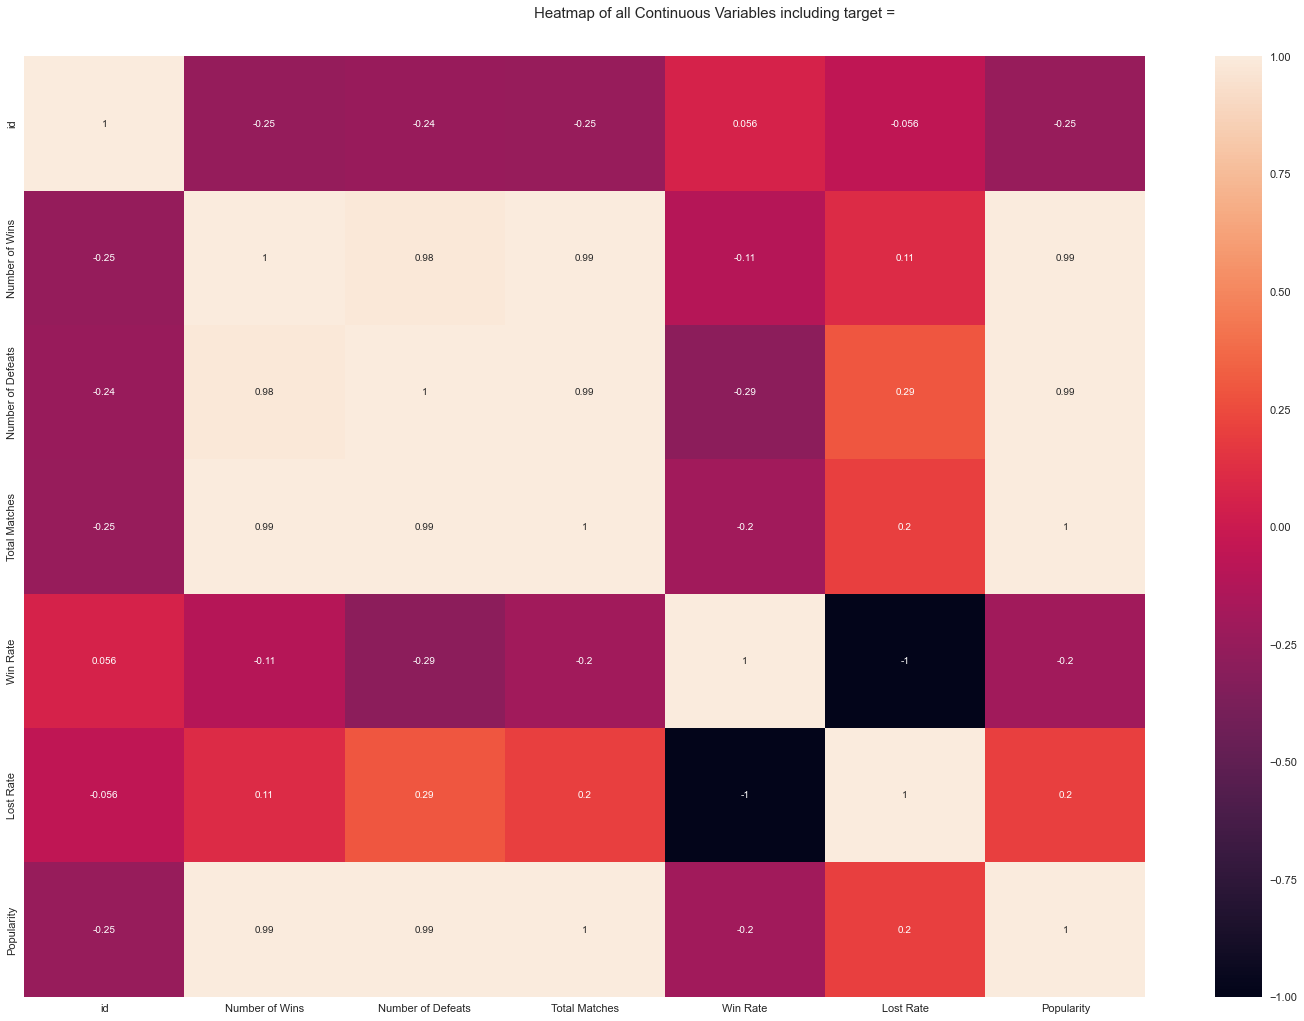

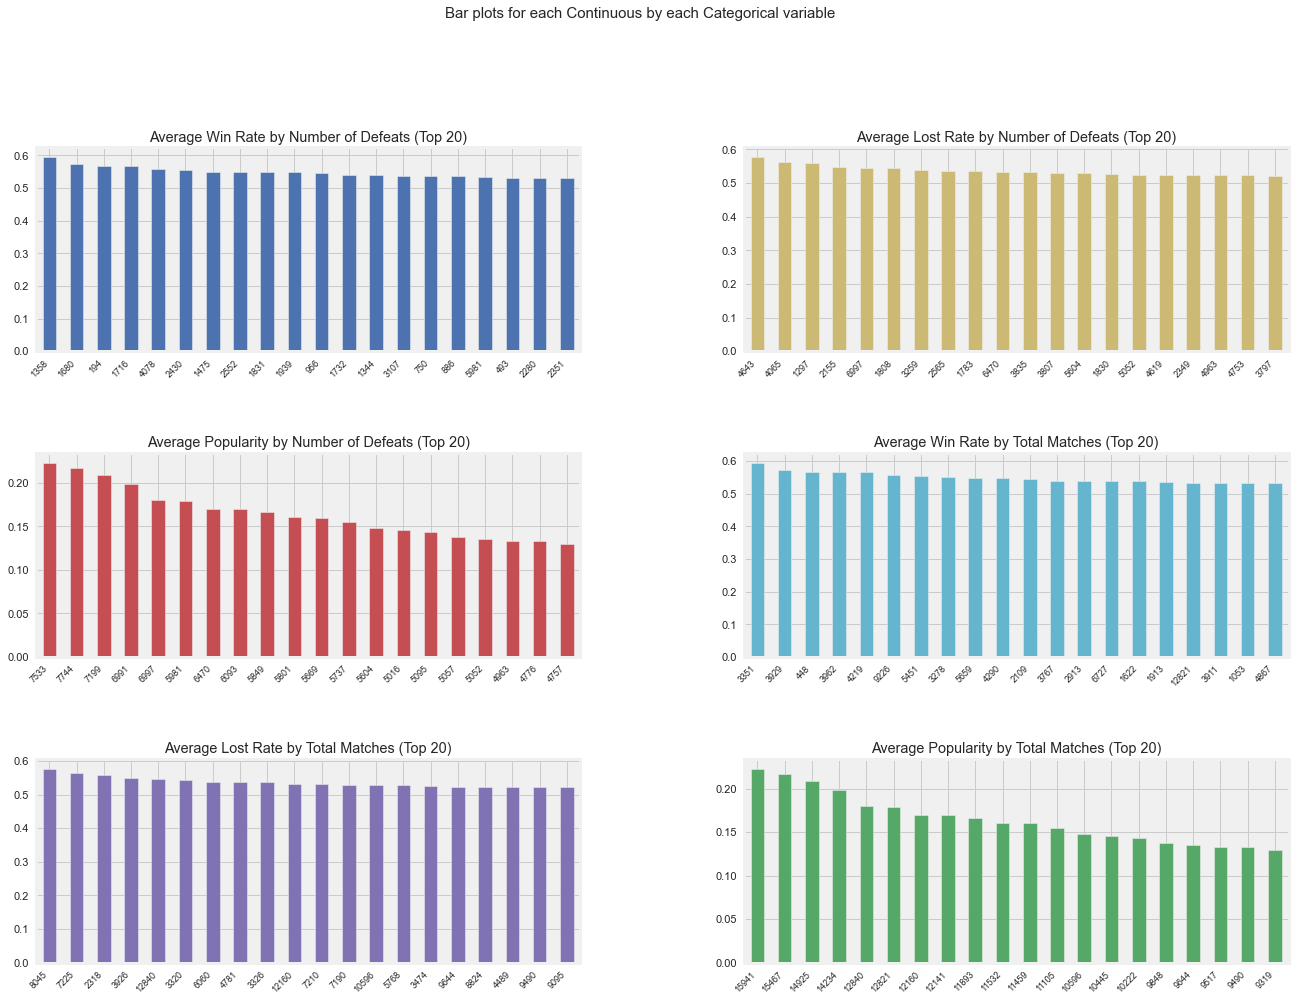

Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [35]:
filename = "HeroFinal.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)